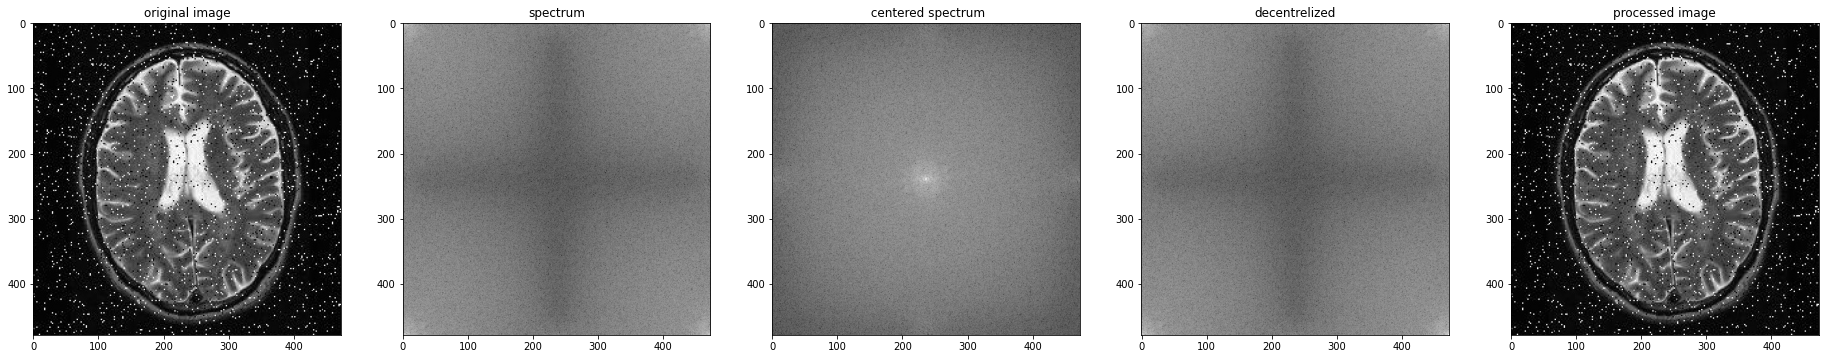

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
#from google.colab import drive
#drive.mount('')

img=cv2.imread('/content/WhatsApp Image 2021-07-28 at 6.58.13 PM.jpeg',0)
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img_c2=np.fft.fft2(img)
img_c3=np.fft.fftshift(img_c2)
img_c4=np.fft.fftshift(img_c3)
img_c5=np.fft.ifft2(img_c4)
plt.subplot(151),plt.imshow(img,'gray'), plt.title('original image')
plt.subplot(152),plt.imshow(np.log(1+np.abs(img_c2)),'gray'), plt.title('spectrum')
plt.subplot(153),plt.imshow(np.log(1+np.abs(img_c3)),'gray'), plt.title(' centered spectrum')
plt.subplot(154),plt.imshow(np.log(1+np.abs(img_c4)),'gray'), plt.title('decentrelized')
plt.subplot(155),plt.imshow(np.abs(img_c5),'gray'), plt.title('processed image')

plt.show()




In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) <D0:
                base[y,x] = 1
    return base

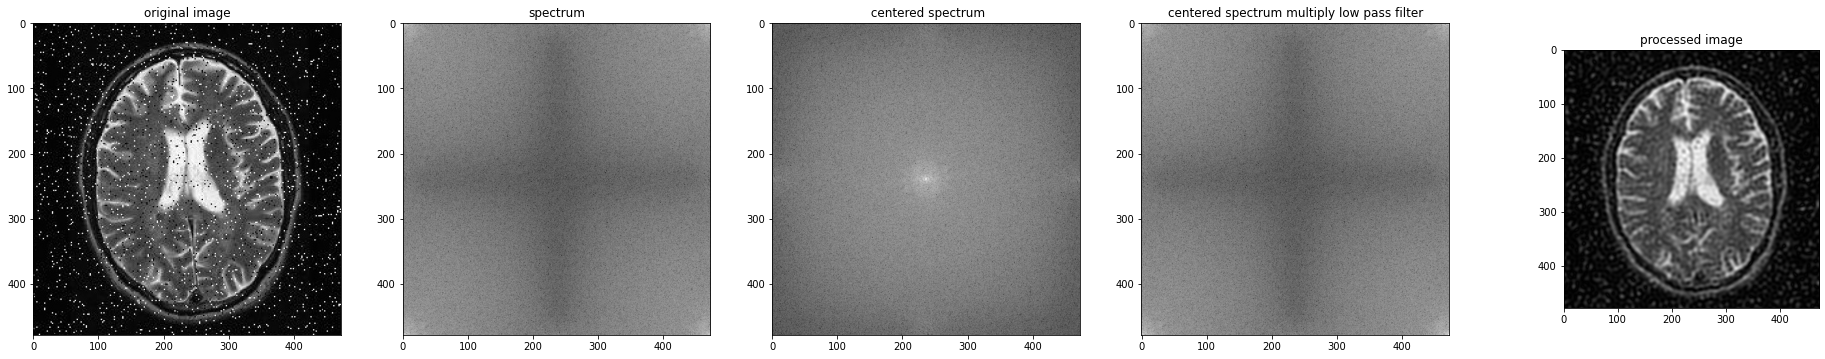

In [ ]:
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
plt.subplot(151),plt.imshow(img,'gray'), plt.title('original image')
original=np.fft.fft2(img)
plt.subplot(152),plt.imshow(np.log(1+np.abs(original)),'gray'), plt.title('spectrum')
center=np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),'gray'), plt.title(' centered spectrum')
LowPassCenetr=center*idealFilterLP(50,img.shape)
plt.subplot(154),plt.imshow(np.log(1+np.abs(img_c4)),'gray'), plt.title('centered spectrum multiply low pass filter')
LowPass=np.fft.fftshift(LowPassCenetr)
plt.subplot(155),plt.imshow(np.log(1+np.abs(LowPass)),'gray'), plt.title('decenterlized')
inverse_LowPass=np.fft.ifft2(LowPass)
plt.subplot(166),plt.imshow(np.abs(inverse_LowPass),'gray'), plt.title('processed image')
plt.show()

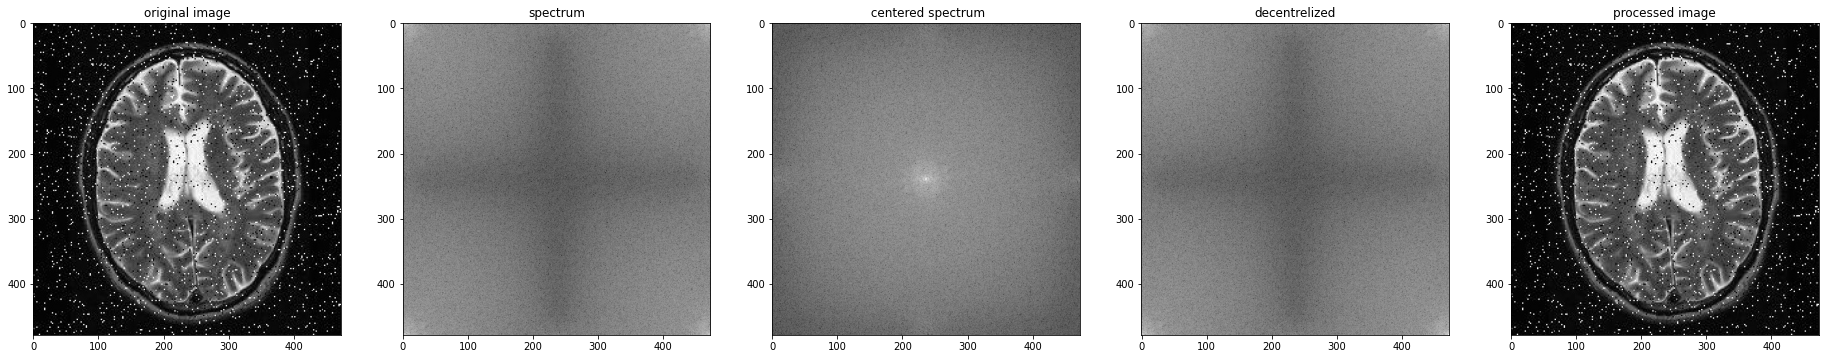

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
#from google.colab import drive
#drive.mount('')

img=cv2.imread('/content/WhatsApp Image 2021-07-28 at 6.58.13 PM.jpeg',0)
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img_c2=np.fft.fft2(img)
img_c3=np.fft.fftshift(img_c2)
img_c4=np.fft.fftshift(img_c3)
img_c5=np.fft.ifft2(img_c4)
plt.subplot(151),plt.imshow(img,'gray'), plt.title('original image')
plt.subplot(152),plt.imshow(np.log(1+np.abs(img_c2)),'gray'), plt.title('spectrum')
plt.subplot(153),plt.imshow(np.log(1+np.abs(img_c3)),'gray'), plt.title(' centered spectrum')
plt.subplot(154),plt.imshow(np.log(1+np.abs(img_c4)),'gray'), plt.title('decentrelized')
plt.subplot(155),plt.imshow(np.abs(img_c5),'gray'), plt.title('processed image')

plt.show()

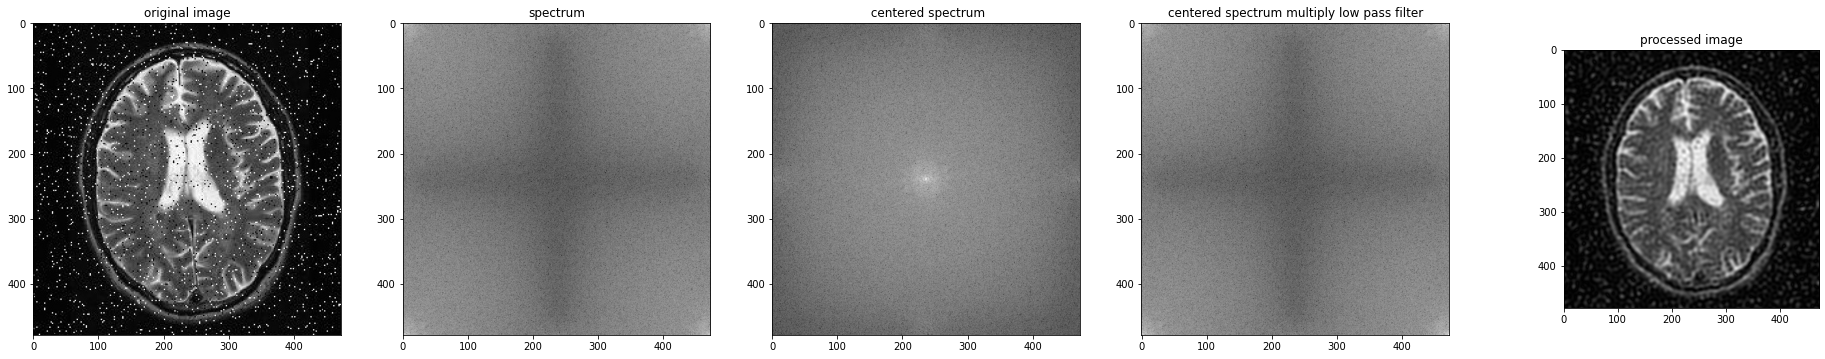

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

#Ideal Low Pass Filter

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) <D0:
                base[y,x] = 1
    return base
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
plt.subplot(151),plt.imshow(img,'gray'), plt.title('original image')
original=np.fft.fft2(img)
plt.subplot(152),plt.imshow(np.log(1+np.abs(original)),'gray'), plt.title('spectrum')
center=np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),'gray'), plt.title(' centered spectrum')
LowPassCenetr=center*idealFilterLP(50,img.shape)
plt.subplot(154),plt.imshow(np.log(1+np.abs(img_c4)),'gray'), plt.title('centered spectrum multiply low pass filter')
LowPass=np.fft.fftshift(LowPassCenetr)
plt.subplot(155),plt.imshow(np.log(1+np.abs(LowPass)),'gray'), plt.title('decenterlized')
inverse_LowPass=np.fft.ifft2(LowPass)
plt.subplot(166),plt.imshow(np.abs(inverse_LowPass),'gray'), plt.title('processed image')
plt.show()

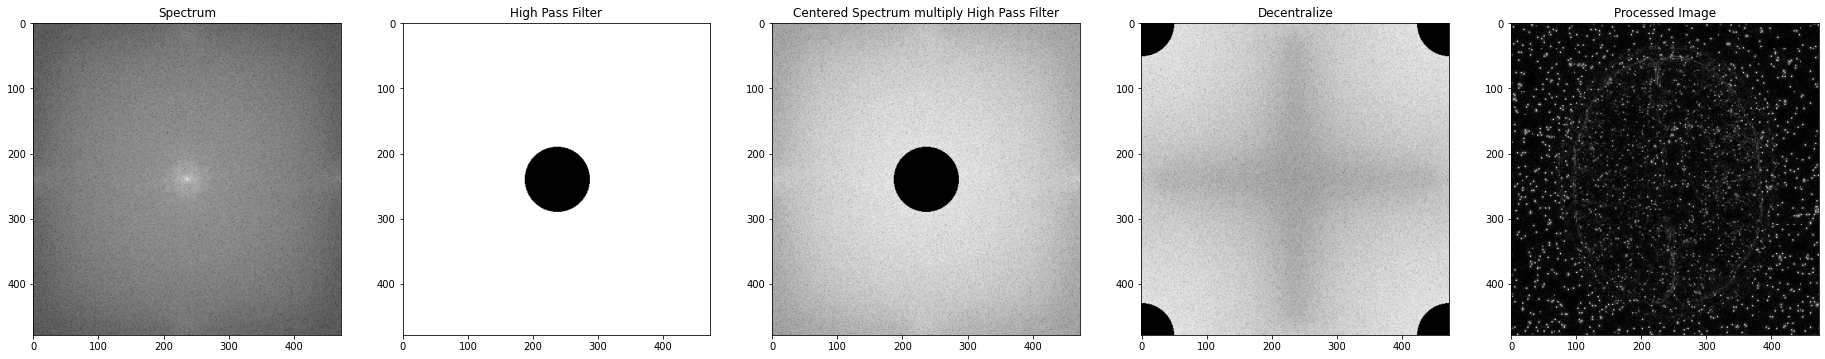

In [ ]:
#Ideal High Pass Filter

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:4])
    rows, cols = imgShape[:4]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
#Ideal High Pass Filter

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

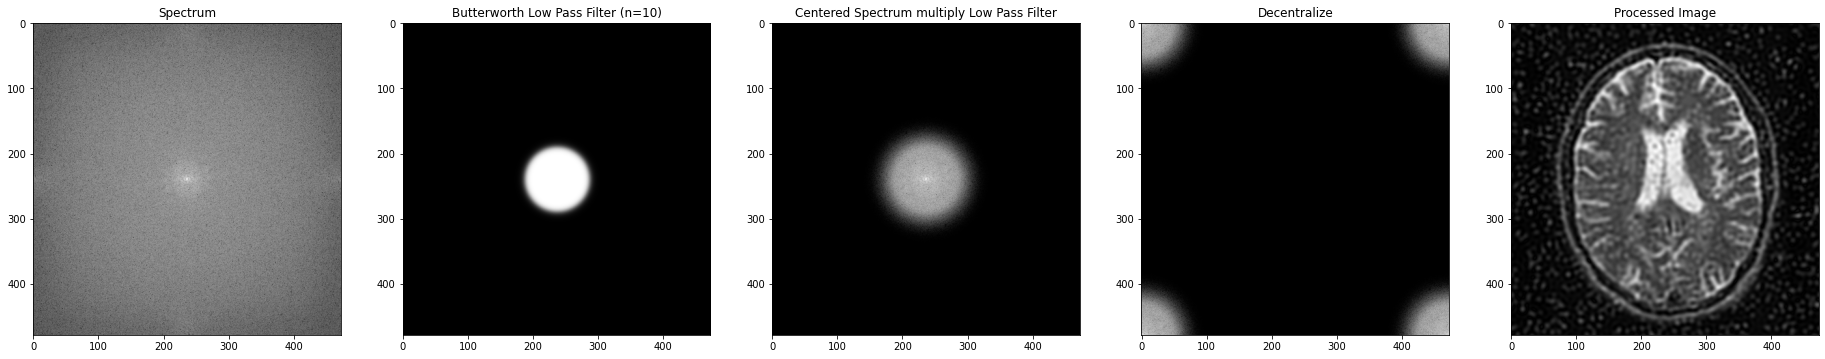

In [ ]:
# betterworth low pass
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(152), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")  
LowPassCenter = center *  butterworthLP(50,img.shape,10)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

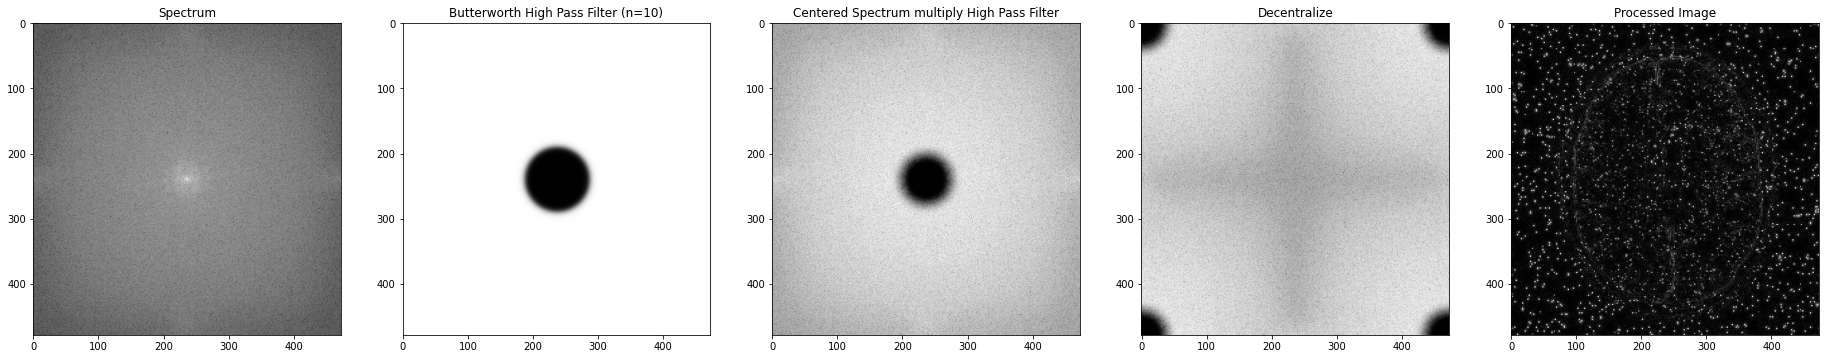

In [ ]:
# better worth high pass
def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(152), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")  
HighPassCenter = center *  butterworthHP(50,img.shape,10)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

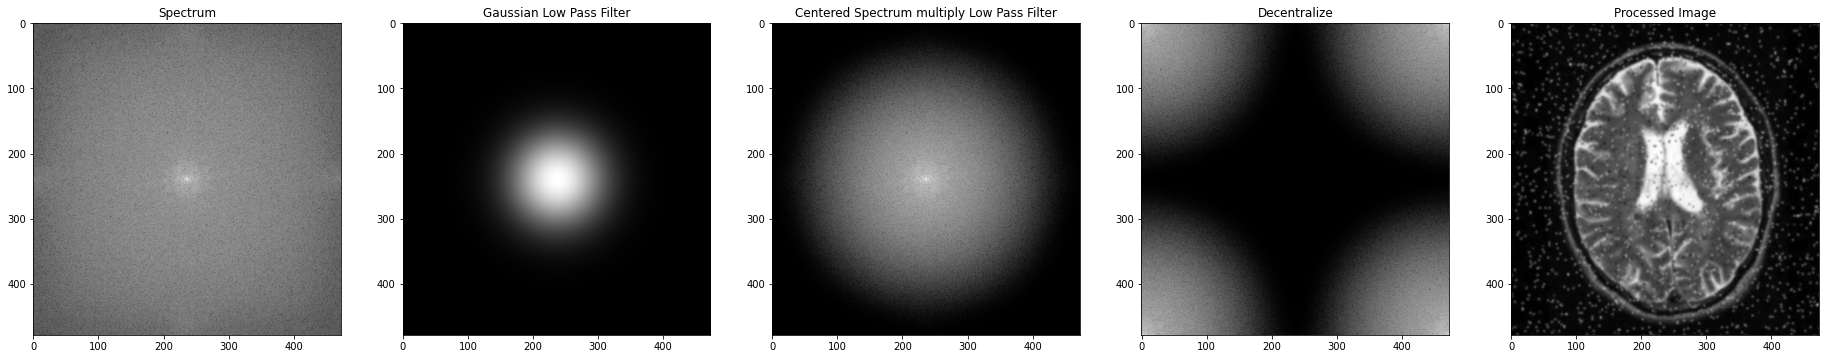

In [ ]:
# Guassian Low pass filter
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(152), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

LowPassCenter = center * gaussianLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

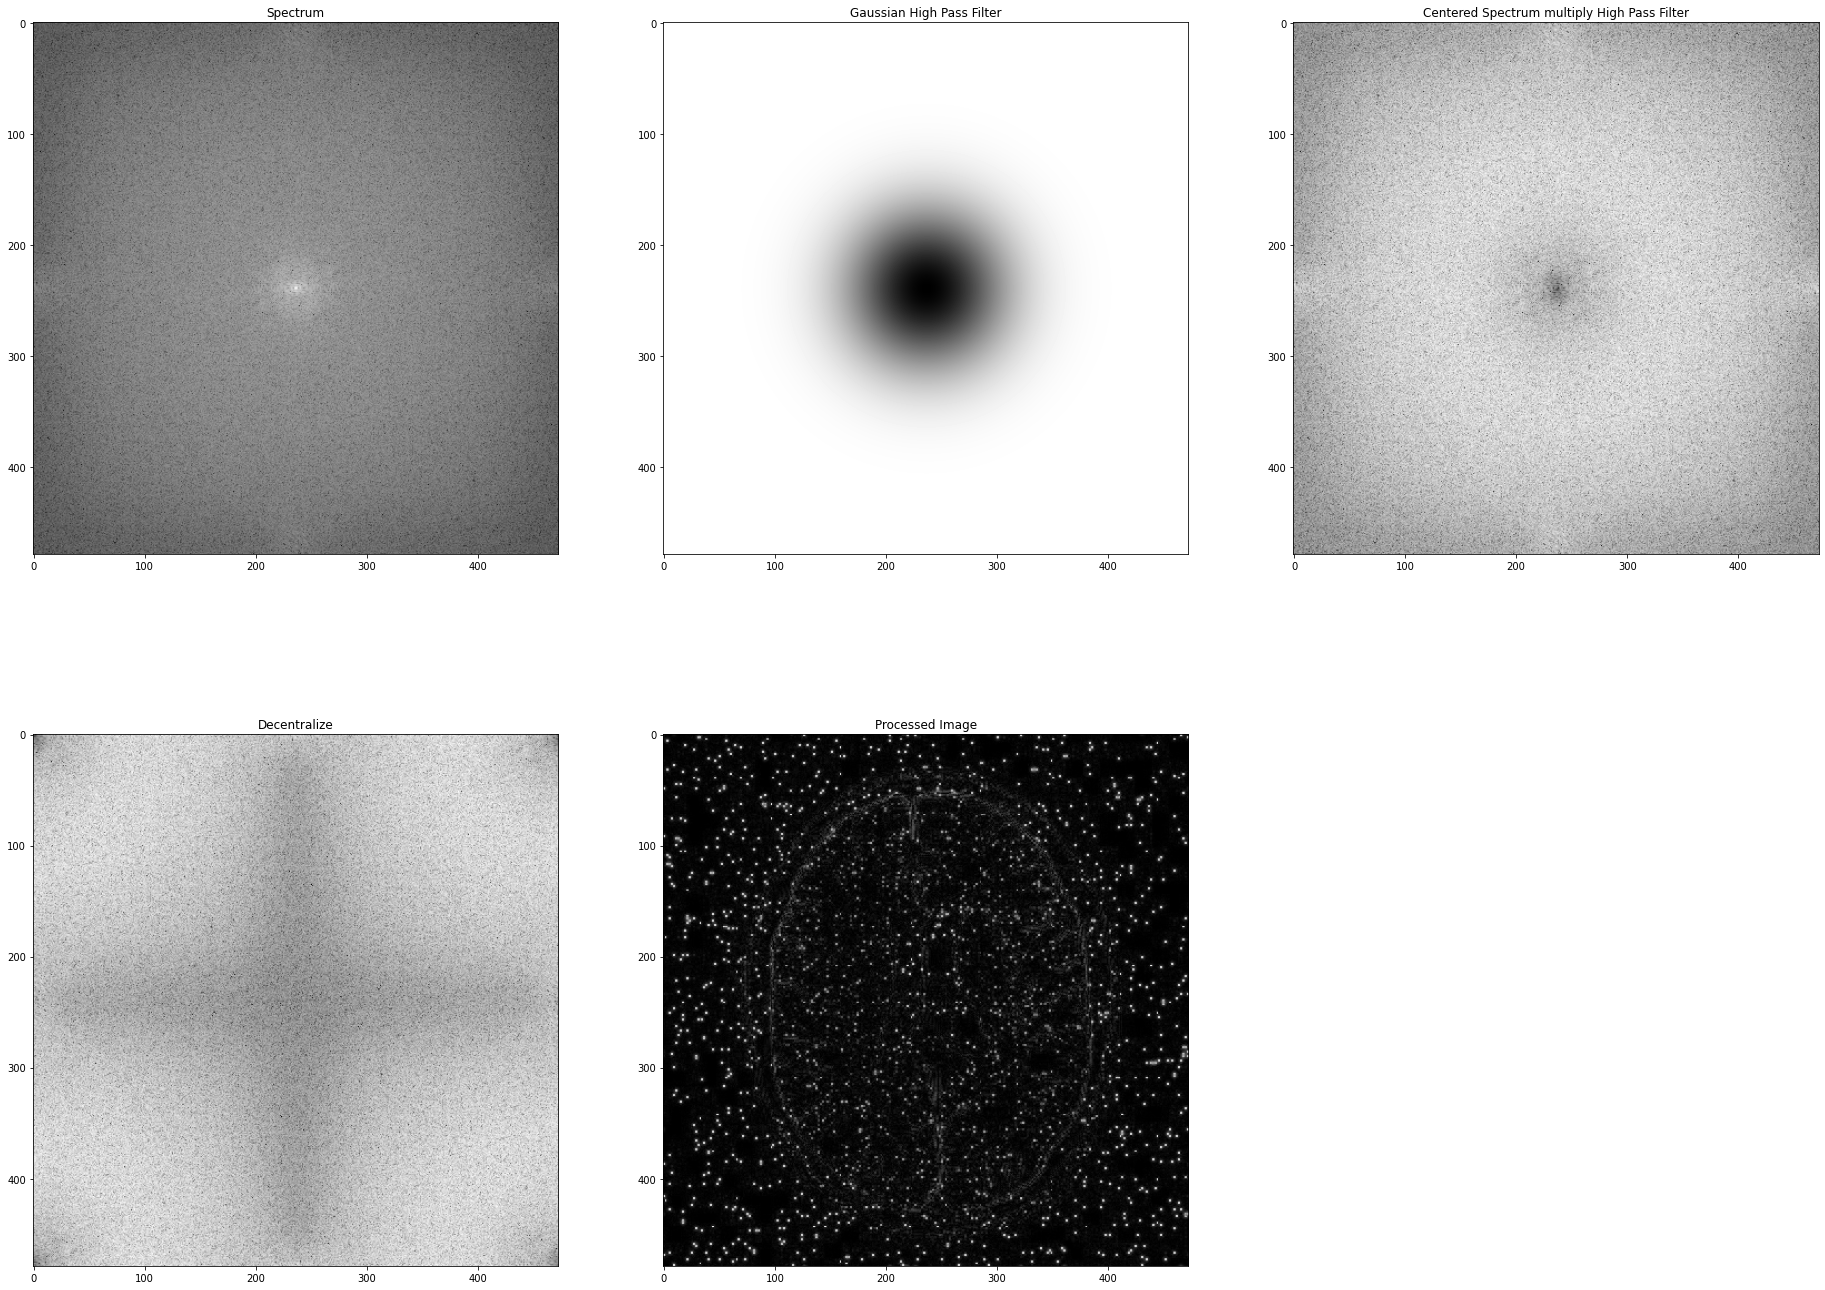

In [ ]:
# gaussian high pass filter
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(231), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(232), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")


HighPassCenter = center * gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(234), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(235), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()